In [131]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [132]:
data=pd.read_csv('data/teldata.csv')
data



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [133]:
data.drop('customerID',axis='columns',inplace=True)

In [134]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [136]:
data['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [137]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [138]:
data[data['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [139]:
# as there is only 11 rows with nan as total charfe we can drop them
data.dropna(inplace=True,axis='rows',subset=['TotalCharges'])

data.shape

(7032, 20)

In [140]:
data.reset_index(inplace=True,drop=True)

In [141]:
data.shape

(7032, 20)

In [142]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [143]:
data[data['Churn']=='Yes'].tenure

2        2
4        2
5        8
8       28
13      49
        ..
7010    12
7015     9
7021     1
7023    67
7030     4
Name: tenure, Length: 1869, dtype: int64

In [144]:
data.shape

(7032, 20)

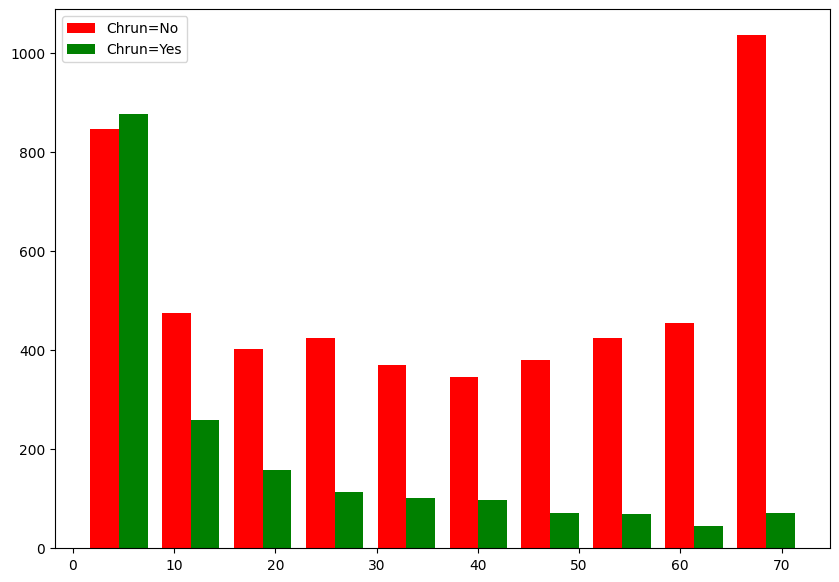

In [145]:
plt.figure(figsize=(10,7))

plt.hist([data[data['Churn']=='No'].tenure,data[data['Churn']=='Yes'].tenure],color=['red','green'],label=['Chrun=No','Chrun=Yes'])
plt.legend()

In [146]:
data['StreamingMovies'].nunique()



3

In [147]:
data['SeniorCitizen'].dtypes

dtype('int64')

In [148]:
data_label=data['Churn']
data=data.drop('Churn',axis=1)

In [149]:
data_label.shape

(7032,)

In [150]:
for column in data:
    print(f"{column}:{data[column].unique()} number of unique values are {data[column].nunique()}")

gender:['Female' 'Male'] number of unique values are 2
SeniorCitizen:[0 1] number of unique values are 2
Partner:['Yes' 'No'] number of unique values are 2
Dependents:['No' 'Yes'] number of unique values are 2
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] number of unique values are 72
PhoneService:['No' 'Yes'] number of unique values are 2
MultipleLines:['No phone service' 'No' 'Yes'] number of unique values are 3
InternetService:['DSL' 'Fiber optic' 'No'] number of unique values are 3
OnlineSecurity:['No' 'Yes' 'No internet service'] number of unique values are 3
OnlineBackup:['Yes' 'No' 'No internet service'] number of unique values are 3
DeviceProtection:['No' 'Yes' 'No internet service'] number of unique values are 3
TechSupport:['No' 'Yes' 'No internet service'] number of unique values are 3
StreamingT

In [151]:
yes_no_columns=[i for i in data.columns if ((('No'in data[i].unique() or 'Yes' in data[i].unique()) and data[i].nunique()==2)) or (data[i].nunique()==2 and data[i].dtype=='O')] 

In [152]:
yes_no_columns

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [153]:
from sklearn.preprocessing import OneHotEncoder


encoder=OneHotEncoder(drop='first',sparse_output=False) #drop first column to avoid dummy variable trap

data_encoded_yes_no=encoder.fit_transform(data[yes_no_columns])



In [154]:
data_encoded_yes_no_df=pd.DataFrame(data_encoded_yes_no,columns=encoder.get_feature_names_out())
data_encoded_yes_no_df

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
7027,1.0,1.0,1.0,1.0,1.0
7028,0.0,1.0,1.0,1.0,1.0
7029,0.0,1.0,1.0,0.0,1.0
7030,1.0,1.0,0.0,1.0,1.0


In [155]:
data.drop(yes_no_columns,axis='columns',inplace=True)

In [156]:
data


,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85
1,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50
2,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75
4,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check,84.80,1990.50
7028,0,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.90
7029,0,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check,29.60,346.45
7030,1,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check,74.40,306.60


In [157]:
data=pd.concat([data,data_encoded_yes_no_df],axis='columns')

In [158]:
for column in data:
    print(f"{column}:{data[column].unique()} number of unique values are {data[column].nunique()}")

SeniorCitizen:[0 1] number of unique values are 2
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] number of unique values are 72
MultipleLines:['No phone service' 'No' 'Yes'] number of unique values are 3
InternetService:['DSL' 'Fiber optic' 'No'] number of unique values are 3
OnlineSecurity:['No' 'Yes' 'No internet service'] number of unique values are 3
OnlineBackup:['Yes' 'No' 'No internet service'] number of unique values are 3
DeviceProtection:['No' 'Yes' 'No internet service'] number of unique values are 3
TechSupport:['No' 'Yes' 'No internet service'] number of unique values are 3
StreamingTV:['No' 'Yes' 'No internet service'] number of unique values are 3
StreamingMovies:['No' 'Yes' 'No internet service'] number of unique values are 3
Contract:['Month-to-month' 'One year' 'Two year'] number of unique v

In [159]:
object_columns=[i for i in data.columns if data[i].dtype=='O']

In [160]:
object_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [161]:
from sklearn.preprocessing import OneHotEncoder

object_encoder=OneHotEncoder(drop='first',sparse_output=False)

data_encoded_object=object_encoder.fit_transform(data[object_columns])
data_encoded_object_df=pd.DataFrame(data_encoded_object,columns=object_encoder.get_feature_names_out())
data.drop(object_columns,axis='columns',inplace=True)
data=pd.concat([data,data_encoded_object_df],axis='columns')

In [162]:
data.shape

(7032, 30)

In [163]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

numerical_columns=['tenure','MonthlyCharges','TotalCharges']

data_scaled=scaler.fit_transform(data[numerical_columns])

data_scaled_df=pd.DataFrame(data_scaled,columns=numerical_columns)

data.drop(numerical_columns,axis='columns',inplace=True)

data=pd.concat([data,data_scaled_df],axis='columns')

In [164]:
data.to_csv('data/teldata_cleaned.csv',index=False)

In [165]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,data_label,test_size=0.2,random_state=50)

In [166]:
X_train.shape

(5625, 30)

In [167]:
X_train

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
6394,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.612573,1.721915,2.671015
1672,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.076528,-1.309614,-0.939729
2718,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.465369,-1.472492,-0.829631
1188,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.035784,0.852677,-0.745541
3632,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.239504,-0.486913,-0.956583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.408853,1.306409,2.098971
6253,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.512486,1.062092,0.952722
1931,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.756950,-0.142874,0.380237
5600,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.139417,0.510300,-0.007964


In [168]:
y_train,y_test=y_train.map({'Yes':1,'No':0}),y_test.map({'Yes':1,'No':0})
y_train,y_test

(6394    0
 1672    0
 2718    0
 1188    1
 3632    1
        ..
 2014    1
 6253    0
 1931    0
 5600    1
 5808    1
 Name: Churn, Length: 5625, dtype: int64,
 4452    0
 732     0
 5505    0
 5855    0
 914     0
        ..
 5017    0
 5163    0
 6531    0
 3125    0
 5502    0
 Name: Churn, Length: 1407, dtype: int64)

In [169]:
data

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.280248,-1.161694,-0.994194
1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.064303,-0.260878,-0.173740
2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.239504,-0.363923,-0.959649
3,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.512486,-0.747850,-0.195248
4,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.343137,0.664868,-0.129180
7028,0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.612573,1.276493,2.241056
7029,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.872808,-1.170004,-0.854514
7030,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.158016,0.319168,-0.872095


In [170]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5625, 30), (5625,), (1407, 30), (1407,))

In [173]:
#neural network overfits the data


from keras import regularizers

model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100


/Users/rafid/Library/Mobile Documents/com~apple~CloudDocs/deep learning/deep-learning-note-books/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7222 - loss: 0.5335
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7712 - loss: 0.4711
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7830 - loss: 0.4544
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7889 - loss: 0.4444
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7837 - loss: 0.4491
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7961 - loss: 0.4335
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8016 - loss: 0.4240
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7991 - loss: 0.4263
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7942 - loss: 0.4380
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7942 - loss: 0.4287
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8044 - loss: 0.4109
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [86]:
y_train

6394    0
1672    0
2718    0
1188    1
3632    1
       ..
2014    1
6253    0
1931    0
5600    1
5808    1
Name: Churn, Length: 5625, dtype: int64

In [ ]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8243 - loss: 0.4076


[0.40690693259239197, 0.8194740414619446]

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()

rf_model.fit(X_train,y_train)

print(rf_model.score(X_test,y_test))

from sklearn.metrics import confusion_matrix

y_pred=rf_model.predict(X_test)

confusion_matrix(y_test,y_pred)


0.7953091684434968


array([[948, 111],
       [177, 171]])